In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
# import the dataset
# Making a list of missing value types
missing_values = ["?", ""] # After check the csv files, we can find the missing values are ?.
data = pd.read_csv('breast-cancer-wisconsin.csv', na_values = missing_values) 
print(data.shape)
data.head(10)

(699, 11)


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


# I.	Summarizing each column

In [19]:
data.describe()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# II.	Identifying missing values

In [20]:
data.isnull()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [21]:
data.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

# III.	Replacing the missing values with the “mean” of the column.

In [22]:
# Replacing the missing values with the “mean” of the column
# We found that only F6 column contains missing values
data['F6'] = data['F6'].fillna(data['F6'].mean())

In [23]:
data.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

# IV.	Displaying the frequency table of “Class” vs. F6

In [24]:
# frequency table of F6
count_F6 = pd.crosstab(index=data["F6"], columns="count")                  
count_F6

col_0,count
F6,
1.000000,402
2.000000,30
3.000000,28
3.544656,16
4.000000,19
5.000000,30
6.000000,4
7.000000,8
8.000000,21


In [25]:
# frequency table of class
count_Class = pd.crosstab(index=data["Class"], columns="count")                  
count_Class

col_0,count
Class,
2,458
4,241


In [26]:
# frequency table of Class vs. F6
class_F6 = pd.crosstab(index=data["Class"], 
                           columns=data["F6"])
class_F6.index= ["Class 2","Class 4"]
class_F6

F6,1.000000,2.000000,3.000000,3.544656,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Class 2,387,21,14,14,6,10,0,1,2,0,3
Class 4,15,9,14,2,13,20,4,7,19,9,129


# V.	Displaying the scatter plot of F1 to F6, one pair at a time

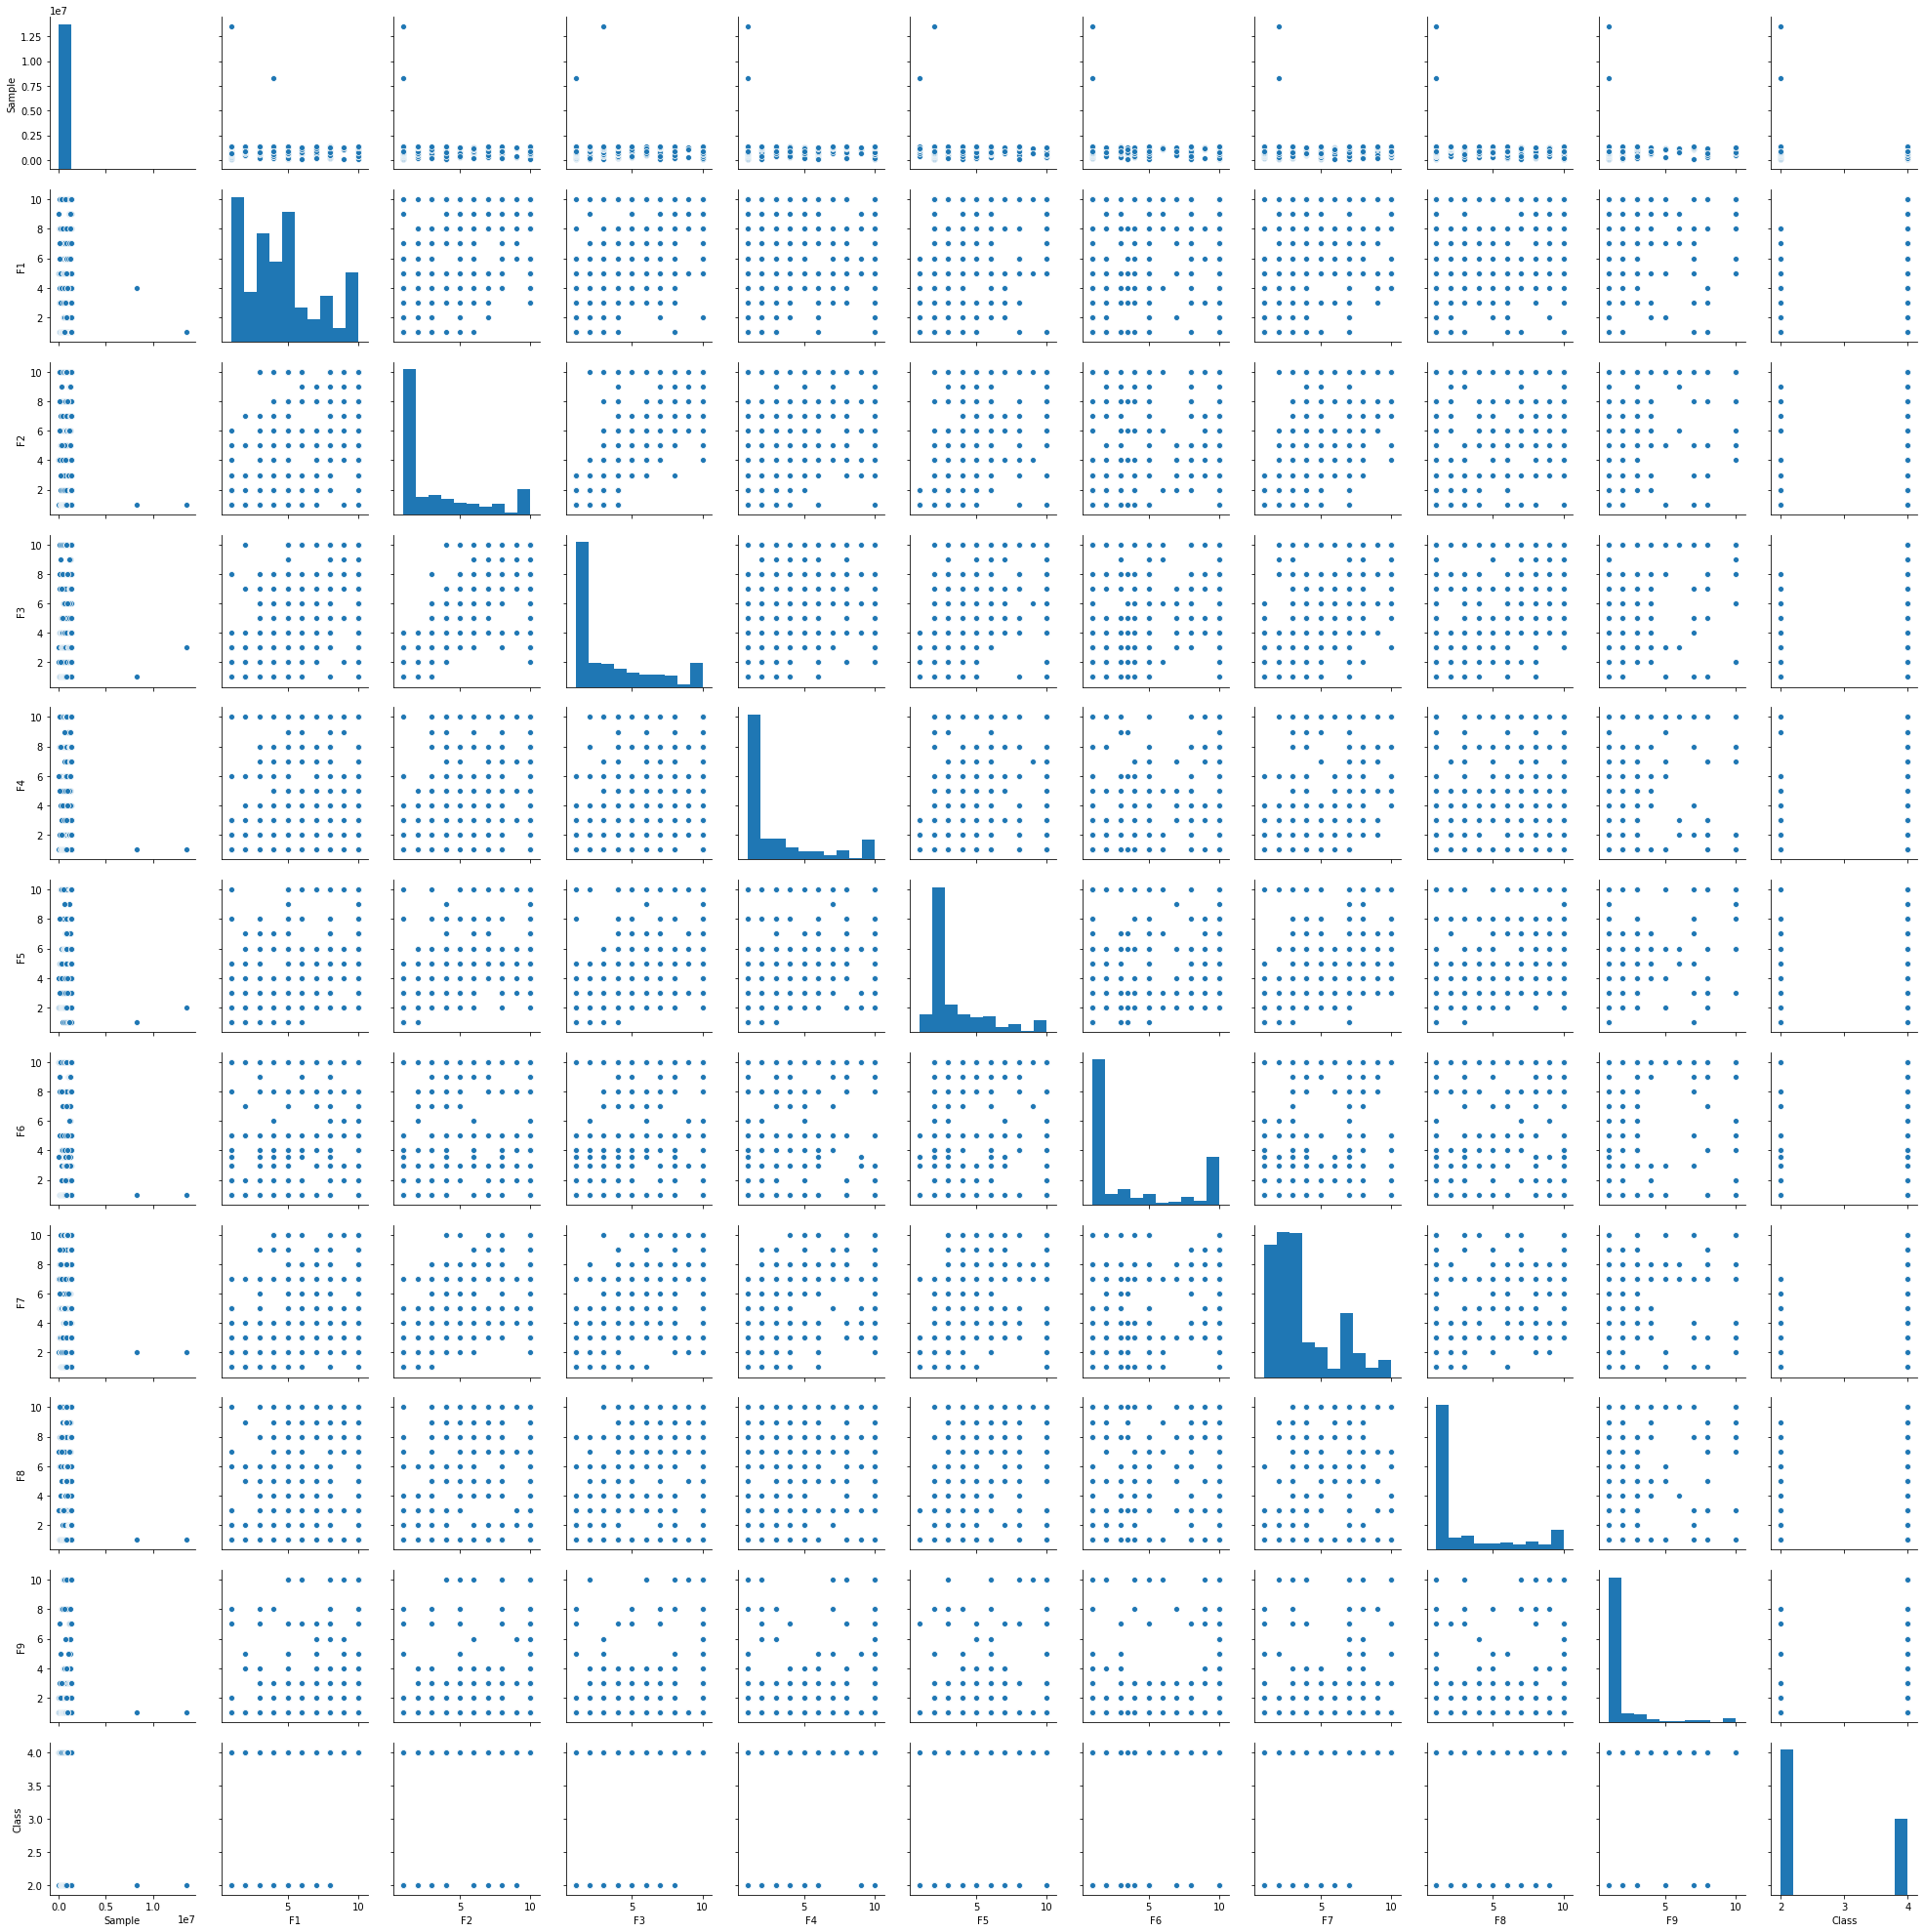

In [27]:
sns.pairplot(data)

# VI.	Show histogram box plot for columns F7 to F9

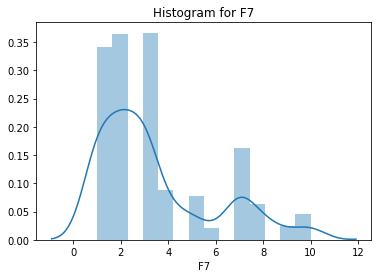

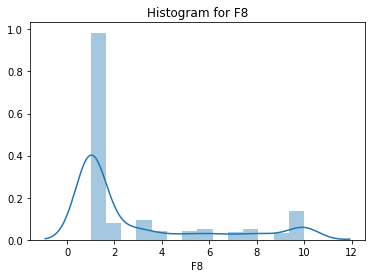

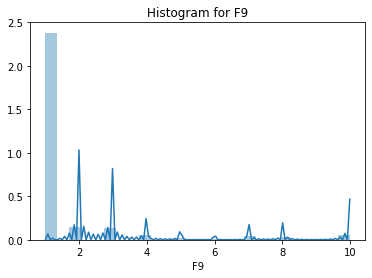

In [40]:
for feature in ['F7', 'F8','F9']:
    sns.distplot(data[feature],kde= True )
    plt.title('Histogram for {}'.format(feature))
    plt.show()

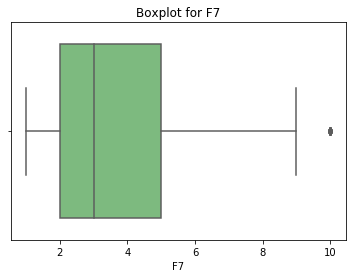

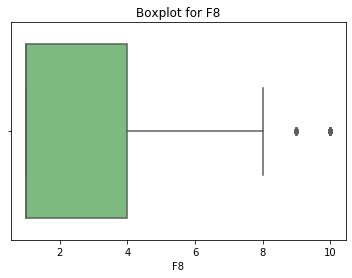

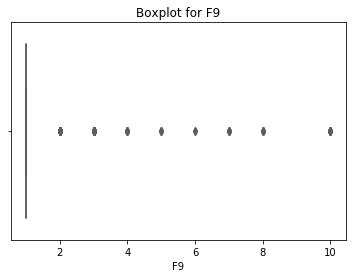

In [42]:
for feature in ['F7', 'F8','F9']:
    sns.boxplot(x=data[feature],palette="Greens")
    plt.title('Boxplot for {}'.format(feature))
    plt.show()

# Delete all the objects from your environment. Reload the “breast-cancer-wisconsin.data.csv”. 

In [31]:
del data

In [32]:
missing_values = ["?", ""] 
data = pd.read_csv('breast-cancer-wisconsin.csv', na_values = missing_values) 

# Remove any row with a missing value in any of the columns.

In [33]:
data.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [34]:
data.dropna(inplace=True)

In [35]:
data.isnull().sum()

Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64

In [36]:
data.shape

(683, 11)

Hnece we successful remove any row with a missing value in any of the columns